In [3]:
#지금까지 해본 그래프
# 바 그래프
# 막대 그래프

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Noto Serif CJK JP'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('~/share/auto-mpg.csv', header=None)
df.columns = ['연비', '실린더 수','배기량', '출력', '차중', '가속능력', '출시년도', '제조국', '모델명']
df

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


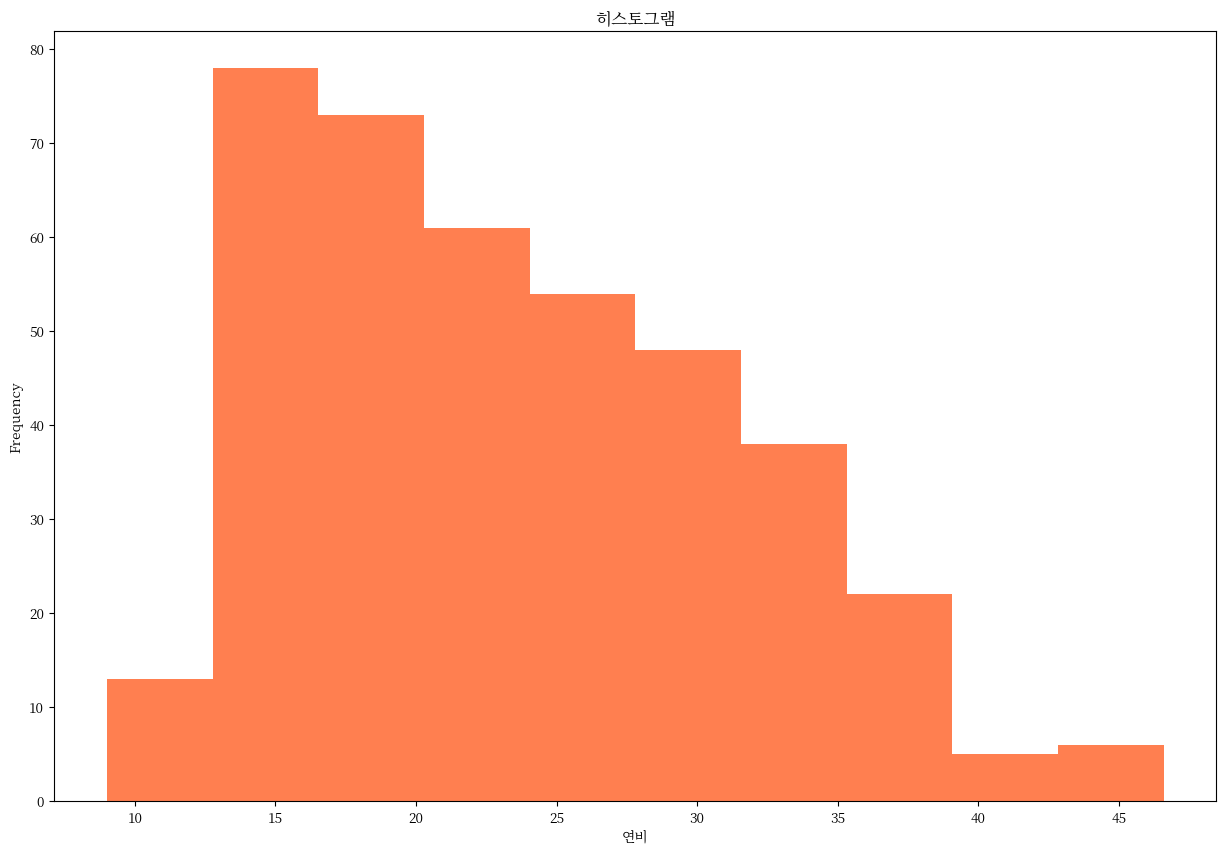

In [5]:
# 연비 칼럼에 대한 히스토그램 드리기
df['연비'].plot(kind='hist', bins=10, color='coral', figsize=(15, 10))
# 지금까지 배운 그래프 라이브러리
# pandas
# scatter
# matplotlib


#어떤 그래프 라이브러리를 쓰든 plt 객체를 사용함!
# 항상 최외곽 wrapping 객체는 plt여야 함!

plt.title('히스토그램')
plt.xlabel('연비')
plt.show()

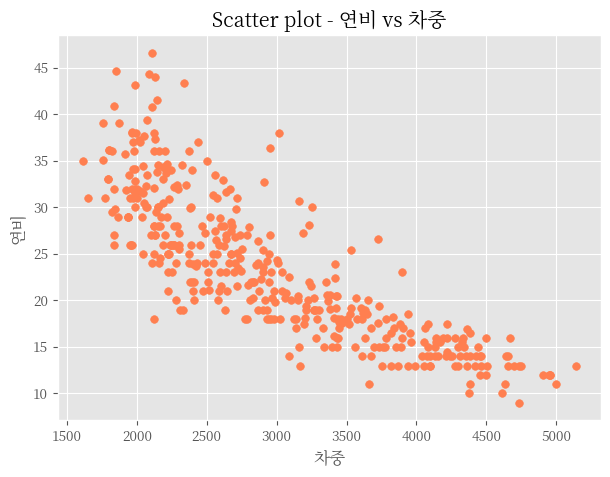

In [6]:
plt.style.use('ggplot')

# scatter - 상관관계 볼 때 사용(두 변수 모두 이산형 데이터)

# 연비와 차종 칼럼에 대한 상관관계 산점도

df.plot(kind='scatter', x='차중', y='연비', c='coral', s=30, figsize=(7, 5))
plt.title('Scatter plot - 연비 vs 차중')
plt.show()

In [7]:
# 차중이 높아질수록 연비가 떨어지는 건 알겠음
# -> 실린더 수와의 관계도 추가하려면?

cylinder_size = df['실린더 수'] / df['실린더 수'].max() * 300

# max normalization
# 최대 정규화 수행 - 최대와 얼만큼 차이가 나는지 계산 - (data / 최대값) x scale
cylinder_size

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: 실린더 수, Length: 398, dtype: float64

<Axes: xlabel='차중', ylabel='연비'>

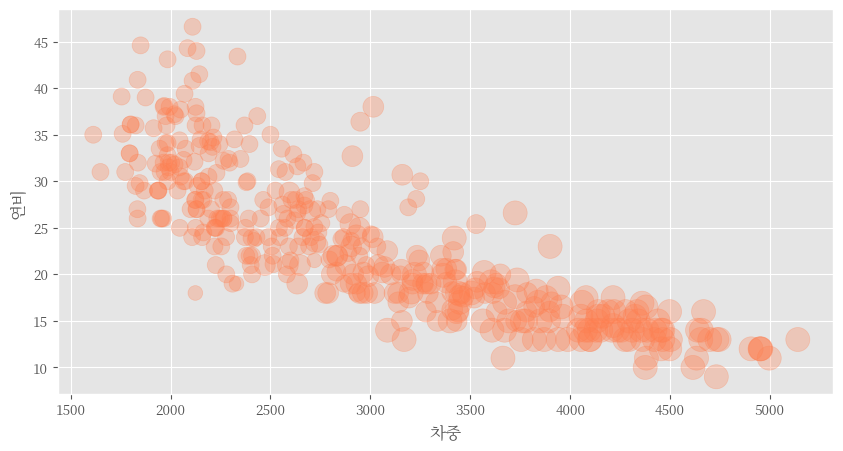

In [8]:
# 3개의 변수로 산점도 그리기(버블 차트)
df.plot(kind='scatter', x = '차중', y = '연비', c = 'coral', figsize=(10, 5),
        s=cylinder_size, alpha = 0.3)

#사이즈를 최대 정규화한 실린더 수 시리즈로 정함!
# -> 원의 크기가 클수록 실린더 수가 높은 것임!

In [9]:
# 
#
#
#
#
#

<Axes: xlabel='차중', ylabel='연비'>

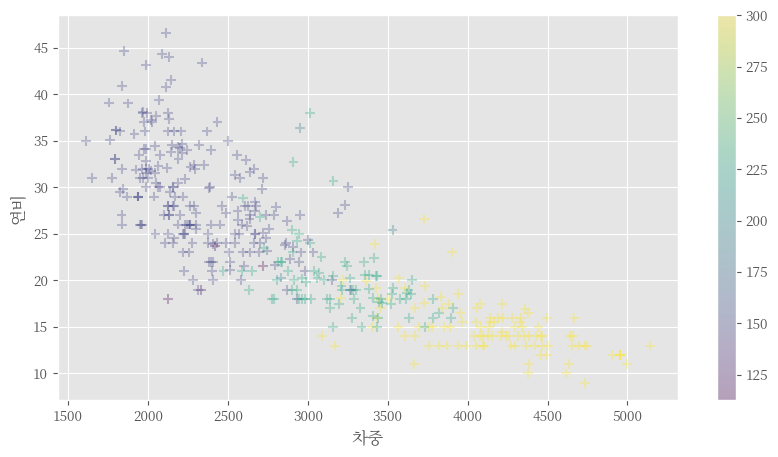

In [10]:
# color map chart

# 사이즈가 아니라 c를 바꿔서 그림!
df.plot(kind='scatter', x = '차중', y = '연비', marker='+', c = cylinder_size, figsize=(10, 5),
        s=50, alpha = 0.3, cmap='viridis')

# 범주형 데이터에 대한 상관관계를 조금 더 직관적으로 볼 수 있음!

In [11]:
# 파이차트 그리기
# 데이터 개수 카운트를 위해 값 1을 가진 열 추가 -> 그냥 count 쓰면 안됨?

df['count'] = 1
# df_origin : df에 groupby를 매긴 데이터 프레임
df_origin = df.groupby('제조국').sum()
df_origin

#제조국은 총 3개의 범주(1, 2, 3)

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,모델명,count
제조국,,,,,,,,,
1,5000.8,1556,61229.5,130.0165.0150.0150.0140.0198.0220.0215.0225.01...,837121.0,3743.4,18827,chevrolet chevelle malibubuick skylark 320plym...,249
2,1952.4,291,7640.0,46.0087.0090.0095.00113.090.0070.0076.0060.005...,169631.0,1175.1,5307,volkswagen 1131 deluxe sedanpeugeot 504audi 10...,70
3,2405.6,324,8114.0,95.0088.0088.0095.0065.0069.0095.0097.0092.009...,175477.0,1277.6,6118,toyota corona mark iidatsun pl510datsun pl510t...,79


In [12]:
# 제조국가 값을 실제 국가명으로 변경
df_origin.set_index([['USA', 'EU', 'JPN']], inplace=True)

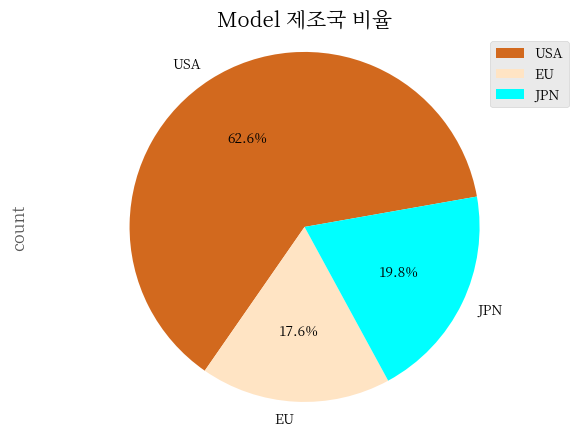

In [13]:
df_origin['count'].plot(kind='pie', figsize=(7, 5), autopct='%1.1f%%',
                       startangle=10,  colors= ['chocolate', 'bisque', 'aqua'] )
#autopct: auto percent: 비율 퍼센트를 어떻게 나타낼지 포맷 지정
# startangle: 시작 각도

plt.title('Model 제조국 비율', size = 15)
plt.legend(labels=df_origin.index, loc='upper right')

# 파이차트만 가지는 옵션!
plt.axis('equal') # 

plt.show()

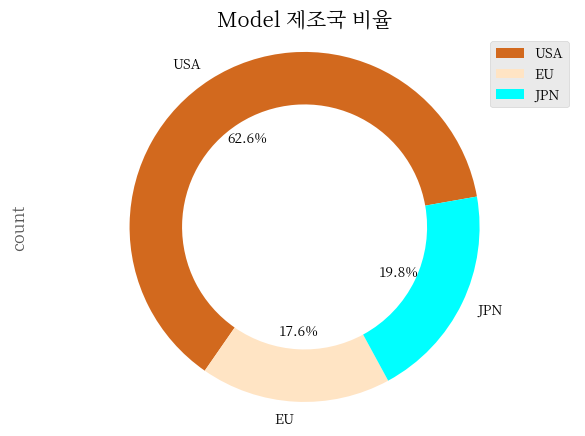

In [14]:
# 요즘은 도넛 차트를 많이 그림!
df_origin['count'].plot(kind='pie', figsize=(7, 5), autopct='%1.1f%%',
                       startangle=10,  colors= ['chocolate', 'bisque', 'aqua'],
                       wedgeprops=dict(width=0.3))

# wedgeprops 옵션으로 도넛 만들기

plt.title('Model 제조국 비율', size = 15)
plt.legend(labels=df_origin.index, loc='upper right')

# 파이차트만 가지는 옵션!
plt.axis('equal') # 

plt.show()

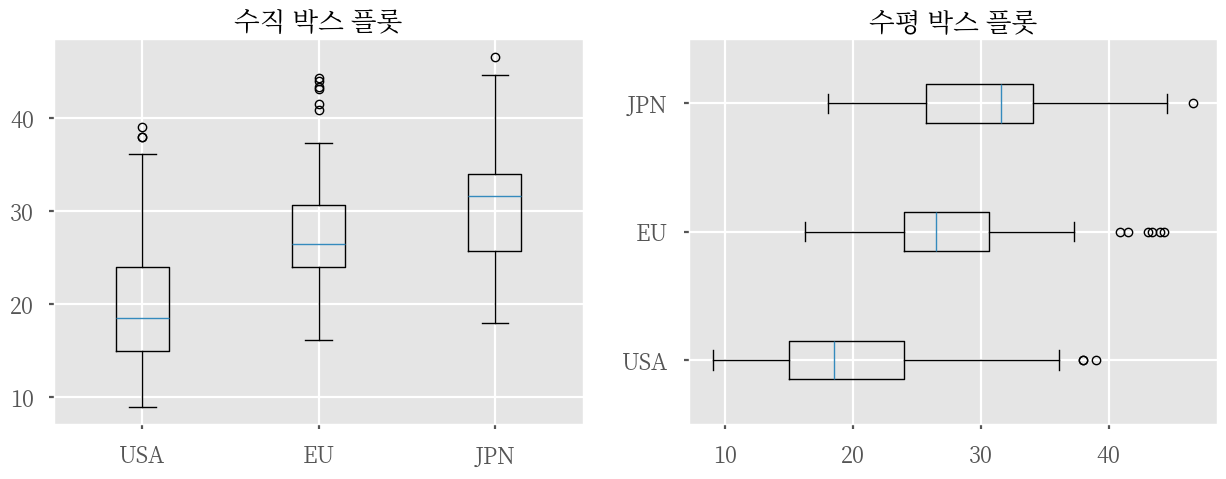

In [21]:
# 박스 plot
plt.style.use('seaborn-v0_8-poster')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x=[df[df['제조국']==1]['연비'], 
               df[df['제조국']==2]['연비'],
               df[df['제조국']==3]['연비']], 
                labels=['USA', 'EU', 'JPN'])

ax1.set_title('수직 박스 플롯')

ax2.boxplot(x=[df[df['제조국']==1]['연비'], 
               df[df['제조국']==2]['연비'],
               df[df['제조국']==3]['연비']], 
                labels=['USA', 'EU', 'JPN'], vert=False)
ax2.set_title('수평 박스 플롯')
plt.show()